## <center> Open Machine Learning Course mlcourse.ai. English session #2

### <center> Autor: Valentin Kovalev (@ValentineKvLove)

## <center> Individual data analysis project </center>
### <center> Predict rain tomorrow in Australia </center>

**Research plan**
 - Feature and data explanation
 - Primary data analysis
 - Primary visual data analysis
 - Insights and found dependencies
 - Metrics selection
 - Model selection
 - Data preprocessing
 - Cross-validation and adjustment of model hyperparameters
 - Creation of new features and description of this process
 - Plotting training and validation curves
 - Prediction for test or hold-out samples
 - Conclusions
 
Read more <a href="https://mlcourse.ai/roadmap">here</a>.

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats

import operator

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### <center> 1. Feature and data explanation

In this dataset there are two targets we can try to predict: **RainTomorrow** or **Risk-MM**. <br>

**RainTomorrow** means: Did it rain the next day? Yes or No. <br>

**Risk-MM** means: The amount of rain the next day. <br>

In this project we'll try to predict **whether or not it will rain tomorrow** by training a binary classification model on target **RainTomorrow**. <br>
<br>
Challenges (some spoilers) in this dataset:<br>
- Unbalanced target RainTomorrow<br>
- Missing data (even in the target)<br>
- Numeric and categorical variables<br><br>

### Content<br>
The content is daily weather observations from numerous Australian weather stations.<br>
There is target we can try to predict: **RainTomorrow**.<br>
**RainTomorrow** means: Did it rain the next day? Yes or No.<br>
### Source & Acknowledgements<br>
Original dataset was obtained from https://www.kaggle.com/jsphyg/weather-dataset-rattle-package <br>
Observations were drawn from numerous weather stations. The daily observations are available from http://www.bom.gov.au/climate/data. Copyright Commonwealth of Australia 2010, Bureau of Meteorology.<br>
<br>
Definitions adapted from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml<br>
<br>
Package home page: http://rattle.togaware.com.
<br> Data source: http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/data.<br>
<br>
And to see some great examples of how to use this data: https://togaware.com/onepager/<br>

### Feature descriptions in dataset

**Date**<br> The date of observation.<br>Type: Datetime<br><br>
**Location**<br> The common name of the location of the weather station.<br>Type: String<br><br>
**MinTemp**<br> The minimum temperature in degrees celsius.<br>Type: Numeric<br><br>
**MaxTemp**<br> The maximum temperature in degrees celsius.<br>Type: Numeric<br><br>
**Rainfall**<br> The amount of rainfall recorded for the day in mm.<br>Type: Numeric<br><br>
**Evaporation**<br> The so-called Class A pan evaporation (mm) in the 24 hours to 9am.<br>Type: String<br><br>
**Sunshine**<br> The number of hours of bright sunshine in the day.<br>Type: String<br><br>
**WindGustDir**<br> The direction of the strongest wind gust in the 24 hours to midnight.<br>Type: String<br><br>
**WindGustSpeed**<br> The speed (km/h) of the strongest wind gust in the 24 hours to midnight.<br>Type: Numeric<br><br>
**WindDir9am**<br> Direction of the wind at 9am.<br>Type: String<br><br>
**WindDir3pm**<br> Direction of the wind at 3pm.<br>Type: String<br><br>
**WindSpeed9am**<br> Wind speed (km/hr) averaged over 10 minutes prior to 9am.<br>Type: Numeric<br><br>
**WindSpeed3pm**<br> Wind speed (km/hr) averaged over 10 minutes prior to 3pm.<br>Type: Numeric<br><br>
**Humidity9am**<br> Humidity (percent) at 9am.<br>Type: Numeric<br><br>
**Humidity3pm**<br> Humidity (percent) at 3pm.<br>Type: Numeric<br><br>
**Pressure9am**<br> Atmospheric pressure (hpa) reduced to mean sea level at 9am.<br>Type: Numeric<br><br>
**Pressure3pm**<br> Atmospheric pressure (hpa) reduced to mean sea level at 3pm.<br>Type: Numeric<br><br>
**Cloud9am**<br> Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.<br>Type: Numeric<br><br>
**Cloud3pm**<br> Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values.<br>Type: Numeric<br><br>
**Temp9am**<br> Temperature (degrees C) at 9am.<br>Type: Numeric<br><br>
**Temp3pm**<br> Temperature (degrees C) at 3pm.<br>Type: Numeric<br><br>
**RainToday**<br> 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0.<br>Type: Boolean<br><br>
**RISK_MM** <br> The amount of rain. A kind of measure of the "risk".<br>Type: Digital<br><br>
**RainTomorrow**<br> The target variable. Did it rain tomorrow?<br>Type: Boolean<br><br>

### <center> 2. Primary data analysis

At first, import libraries to work

In [147]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this will list the files in the input directory

import os

# Any results you write to the current directory are saved as output.

Assign datatypes of all columns that we use in DataFrame object.

In [148]:
dtype = {'Date': str,
         'Location': str,
         'MinTemp': np.float16,
         'MaxTemp': np.float16, 
         'Rainfall': np.float16,
         'Evaporation': np.float16,
         'Sunshine': np.float16, 
         'WindGustDir': str,
         'WindGustSpeed': np.int64,
         'WindDir9am': str,
         'WindDir3am': str,
         'WindSpeed9am': np.uint16,
         'WindSpeed3am': np.uint16,
         'Humidity9am': np.uint16,
         'Humidity3am': np.uint16,
         'Pressure9am': np.float16,
         'Pressure3am': np.float16,
         'Cloud9am': np.uint16,
         'Cloud9am': np.uint16,
         'Temp9am': np.float16,
         'Temp3am': np.float16,
         'RainToday': str,
         'RISK_MM': np.float16,
         'RainTomorrow': str}

Reading data into memory and creating a Pandas DataFrame object.

In [149]:
df_all = pd.read_csv("input/weatherAUS.csv")

Check the number of rows and columns and print column names.

In [150]:
print(df_all.shape)
print(df_all.columns)
df_all.head()

(142193, 24)
Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


Drop 'RISK_MM' column, because we want to solve classification task, and print 5 rows of our new DataFrame object.

In [151]:
df = df_all.drop(columns=['RISK_MM'])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Transpose the frame to see all features at once.

In [152]:
df.head().T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28,32.3
Rainfall,0.6,0,0,0,1
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44,44,46,24,41
WindDir9am,W,NNW,W,SE,ENE


Examine data types of all features and total dataframe size in memory.

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
Evaporation      81350 non-null float64
Sunshine         74377 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Cloud9am         88536 non-null float64
Cloud3pm         85099 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null obje

Let's look at the characteristics of the distribution of categorical features. Immediately we bring the integer signs **Date, Location, WindGustDir, WindDir9am, WindDir3pm, RainToday, RainTomorrow** (which are categorical) to the string type for correct processing by describe () method.

In [154]:
int_features = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

for feat in int_features:
    df[feat] = df[feat].astype('str')
    
df.describe(exclude=['float64']).T

,count,unique,top,freq
Date,142193,3436,2014-01-13,49
Location,142193,49,Canberra,3418
WindGustDir,142193,17,W,9780
WindDir9am,142193,17,N,11393
WindDir3pm,142193,17,SE,10663
RainToday,142193,3,No,109332
RainTomorrow,142193,2,No,110316


The sample includes 49 settlement.<br>
There are no anomalous values in the date, Location and WindDirs.<br>
WindDir (all) - 16 values for directions, and one is for windless.<br>
RainToday - 'Yes'/'No'/NaN - can represented as bool-type.<br>
RainTomorrow - 'Yes'/'No' - can represented as bool-type.<br>

Let us highlight the float features and look at the characteristics of their distribution.

In [155]:
df.describe(include=['float64']).T

,count,mean,std,min,25%,50%,75%,max
MinTemp,141556.0,12.186400,6.403283,-8.5,7.6,12.0,16.8,33.9
MaxTemp,141871.0,23.226784,7.117618,-4.8,17.9,22.6,28.2,48.1
Rainfall,140787.0,2.349974,8.465173,0.0,0.0,0.0,0.8,371.0
Evaporation,81350.0,5.469824,4.188537,0.0,2.6,4.8,7.4,145.0
Sunshine,74377.0,7.624853,3.781525,0.0,4.9,8.5,10.6,14.5
WindGustSpeed,132923.0,39.984292,13.588801,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,140845.0,14.001988,8.893337,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,139563.0,18.637576,8.803345,0.0,13.0,19.0,24.0,87.0
Humidity9am,140419.0,68.843810,19.051293,0.0,57.0,70.0,83.0,100.0
Humidity3pm,138583.0,51.482606,20.797772,0.0,37.0,52.0,66.0,100.0


Можно сделать предварительные выводы по признакам:<br>
- **MinTemp, MaxTemp, Temp9am, Temp3pm** (The minimum/maximum temperature at this day, or temperature at 9am/3pm in degrees celsius) - values probably do not include emissions due to errors of measurement or their number is few; it is possible to do verification using geo-services.
- **Rainfall** (the amount of rainfall recorded for the day in mm) - want to believe that there are no measurement errors, otherwise we have questions to the data layout; more than 50% of the data contain information about the absence of precipitation, and 75% - about the absence or minor precipitation.
- **Evaporation** (The so-called Class A pan evaporation (mm) in the 24 hours to 9am) - looks like that there are no measurement errors, at more days this indicator is > 0, got many (>60%) skipped values.
- **Sunshine** (The number of hours of bright sunshine in the day) - got many skipped values.
- **WindGustSpeed, WindSpeed9am, WindSpeed3pm** (Wind speed) - got NaN values at some positions.
- **Humidity9am, Humidity3pm** (Humidity (percent) at 9am/3pm) - values got some NaN values.
- **Pressure9am, Pressure3pm** (Atmospheric pressure (hpa) reduced to mean sea level at 9am/3pm) - about 10% of NaNs values.
- **Cloud9am, Cloud3pm** (Fraction of sky obscured by cloud at 9am/3pm. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast) - got many NaN values (about 40%), we can try to drop it.

We see there are some columns with null values.<br>
Let's find out which of the columns have maximum null values

In [156]:
df.count().sort_values()

Sunshine          74377
Evaporation       81350
Cloud3pm          85099
Cloud9am          88536
Pressure9am      128179
Pressure3pm      128212
WindGustSpeed    132923
Humidity3pm      138583
Temp3pm          139467
WindSpeed3pm     139563
Humidity9am      140419
Rainfall         140787
WindSpeed9am     140845
Temp9am          141289
MinTemp          141556
MaxTemp          141871
Date             142193
WindDir3pm       142193
WindDir9am       142193
WindGustDir      142193
Location         142193
RainToday        142193
RainTomorrow     142193
dtype: int64

As we can see the first four columns have less than 60% data, we can ignore these four columns. It can be, because the observer was not able to check these features. 

Consider the correlation of real features, excluding the target. We map the distribution and top 20 correlating pairs of features by two methods: Pearson and Spearman (estimating the strength of linear and monotonic relationships, respectively).

In [157]:
numeric_columns = [col for col in df if (df[col].dtype == 'float64')]

pearson_corr = df[numeric_columns].corr(method='pearson')
spearman_corr = df[numeric_columns].corr(method='spearman')

In [158]:
no_target_unique_pearson_corr = dict()
no_target_unique_spearman_corr = dict()

for (row, r_name) in enumerate(pearson_corr.index):
    for (col, c_name) in enumerate(pearson_corr.columns[row+1:]):
        if('RainTomorrow' in [r_name, c_name]):
            continue
        no_target_unique_pearson_corr['{}-{}'.format(r_name, c_name)] = abs(pearson_corr.iloc[row, col])
        
for (row, r_name) in enumerate(spearman_corr.index):
    for (col, c_name) in enumerate(spearman_corr.columns[row+1:]):
        if('RainTomorrow' in [r_name, c_name]):
            continue
        no_target_unique_spearman_corr['{}-{}'.format(r_name, c_name)] = abs(spearman_corr.iloc[row, col])

pearson_corr_df = pd.DataFrame(sorted(no_target_unique_pearson_corr.items(), key=operator.itemgetter(1), reverse=True))
pearson_corr_df.columns = ['', 'pearson corr']

spearman_corr_df = pd.DataFrame(sorted(no_target_unique_spearman_corr.items(), key=operator.itemgetter(1), reverse=True))
spearman_corr_df.columns = ['', 'spearman corr']

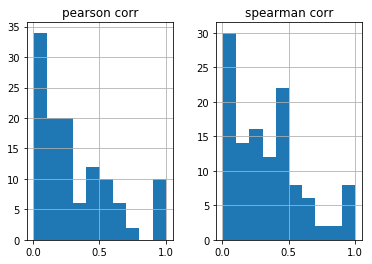

In [159]:
corr_df = pd.concat([pearson_corr_df, spearman_corr_df], axis=1)
corr_df.hist()
plt.show()

In [160]:
corr_df = pd.concat([pearson_corr_df.head(20), spearman_corr_df.head(20)], axis=1)
corr_df

,,pearson corr,,spearman corr
0,MinTemp-MaxTemp,1.000000,MinTemp-MaxTemp,1.000000
1,MaxTemp-Evaporation,1.000000,MaxTemp-Evaporation,1.000000
2,Rainfall-WindGustSpeed,1.000000,Rainfall-WindGustSpeed,1.000000
3,Evaporation-WindSpeed3pm,1.000000,Evaporation-WindSpeed3pm,1.000000
4,Sunshine-Humidity3pm,1.000000,Sunshine-Humidity3pm,1.000000
5,WindGustSpeed-Pressure3pm,1.000000,WindGustSpeed-Pressure3pm,1.000000
6,WindSpeed9am-Cloud3pm,1.000000,WindSpeed9am-Cloud3pm,1.000000
7,WindSpeed3pm-Temp3pm,1.000000,WindSpeed3pm-Temp3pm,1.000000
8,MinTemp-Temp3pm,0.901813,MinTemp-Temp3pm,0.898892
9,Temp9am-Temp3pm,0.901813,Temp9am-Temp3pm,0.898892


We see that both methods on the top results give very similar indicators. It can be assumed that there is a correlation between these features, and the relationship is linear. But dependence is not due to the physical nature of the signs.

Check balance between positive and negative classes:

In [161]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

We can see, that classes unbalanced.

### <center> 3. Primary visual data analysis

Plotting balance between positive and negative classes.

Rain:  110316
Not Rain :  31877


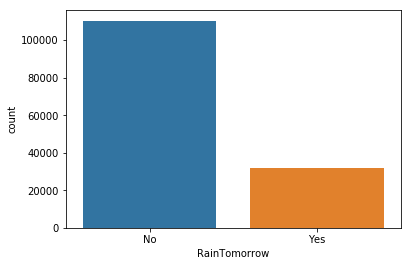

In [162]:
plot_sb = sns.countplot(df['RainTomorrow'], label='Total')
Rain, NotRain = df['RainTomorrow'].value_counts()
print('Rain: ',Rain)
print('Not Rain : ',NotRain)

As we saw before, classes are unbalanced.

Look at heatmap by pearson correlation, that we made before.

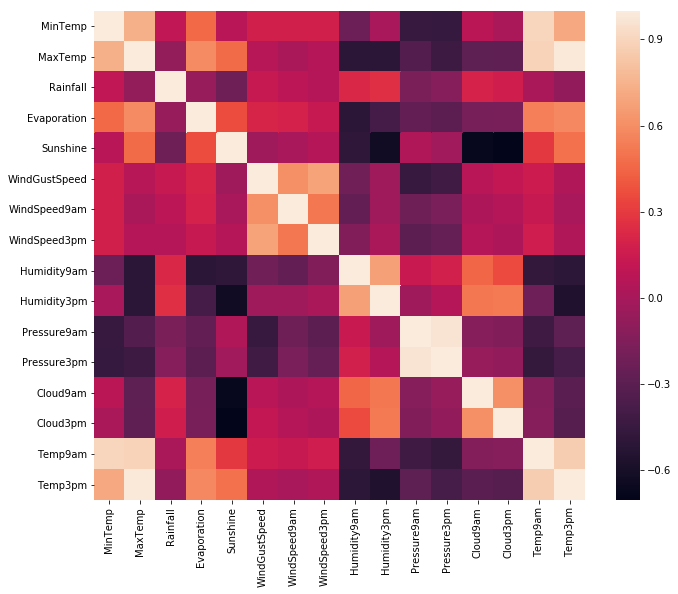

In [163]:
plt.subplots(figsize=(11, 9))
sns.heatmap(pearson_corr)

We can see, that temperature, pressure, windspeed and humidity features at 9am and 3pm are very correlated. <br>
And we can see, that rainfall and all wind features, and wind and cloud features correlated too.

### <center> 4. Insights and found dependencies

Summarise previous results, we can see that:
- temperature, pressure, windspeed and humidity features at one day, but on 9am and 3pm are very correlated. It's usuall and talks, that this features are stable at each day. <br>
- Rainfall and wind features correlated, because, existance of wind talks, that rain is near, and if we seen rain at this day, we got big chance to face with wind. <br>
- Cloud and wind features are correlated, because, its normal nature law.

### <center> 5. Metrics selection

We can see that the classes are very unbalanced. The usual choice of metric for classification tasks with a strong imbalance of classes is a **ROC-AUC** metric. Unlike simpler metrics (for example, the proportion of correct answers), ROC-AUC takes into account both TPR (True Positive Rate) and FPR (False Positive Rate). So it's not sensitive to class imbalance. Also, this metric allows you to assess the quality of the classification, based on the probabilistic assumptions of belonging to the class, without tying to any particular threshold of classification.

### <center> 6. Model selection

For our task we will consider the following model:
- **LogisticRegression**. A simple linear model is a good baseline in almost any classification problem. Its linear coefficients will also allow to assess the importance of a particular feature in the dataset, with the help of L1-regularization it will be possible to get rid of linearly dependent features.

### <center> 7. Data preprocessing

In [164]:
df.count().sort_values()

Sunshine          74377
Evaporation       81350
Cloud3pm          85099
Cloud9am          88536
Pressure9am      128179
Pressure3pm      128212
WindGustSpeed    132923
Humidity3pm      138583
Temp3pm          139467
WindSpeed3pm     139563
Humidity9am      140419
Rainfall         140787
WindSpeed9am     140845
Temp9am          141289
MinTemp          141556
MaxTemp          141871
Date             142193
WindDir3pm       142193
WindDir9am       142193
WindGustDir      142193
Location         142193
RainToday        142193
RainTomorrow     142193
dtype: int64

As we can see the first four columns have less than 60% data, we can ignore these four columns </br>
and don't need the location column because we are going to find if it will rain in Australia(not location specific) </br>
We are going to drop the date column too.

In [165]:
df = df.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','Date'],axis=1)
df.shape

(142193, 17)

Let us get rid of all null values in df as baseline. Students are invited to fill NaN values with mean (temperature features) or zero (wind features).

In [166]:
df = df.dropna(how='any')
df.shape

(119590, 17)

Its time to remove the outliers in our data - we are using Z-score to detect and remove the outliers.

In [167]:
from scipy import stats
z = np.abs(stats.zscore(df._get_numeric_data()))
print(z)
df= df[(z < 3).all(axis=1)]
print(df.shape)

[[0.15915995 0.08387    0.20329958 ... 1.16149309 0.04431849 0.02614842]
 [0.78312355 0.2310207  0.274179   ... 1.06176919 0.00219751 0.3397351 ]
 [0.08063632 0.31689998 0.274179   ... 0.93355274 0.59140008 0.17874635]
 ...
 [1.3799031  0.25964712 0.274179   ... 0.54805952 0.97463834 0.36900578]
 [1.09721805 0.48865854 0.274179   ... 0.22039527 0.72655305 0.60317123]
 [0.72030465 0.50297175 0.274179   ... 0.17765645 0.32341444 0.58853589]]
(114424, 17)


Lets deal with the categorical cloumns. <br>
Simply change yes/no to 1/0 for RainToday and RainTomorrow

In [168]:
df['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

See unique values and convert them to int using pd.getDummies()

In [169]:
categorical_columns = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
for col in categorical_columns:
    print(np.unique(df[col]))


['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW' 'nan']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW' 'nan']
['E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW' 'SW' 'W'
 'WNW' 'WSW' 'nan']


Transform the categorical columns

In [170]:
df = pd.get_dummies(df, columns=categorical_columns)
df.iloc[4:9]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,0,0
5,14.6,29.7,0.2,56.0,19.0,24.0,55.0,23.0,1009.2,1005.4,...,0,0,0,0,0,0,1,0,0,0
6,14.3,25.0,0.0,50.0,20.0,24.0,49.0,19.0,1009.6,1008.2,...,0,0,0,0,0,1,0,0,0,0
7,7.7,26.7,0.0,35.0,6.0,17.0,48.0,19.0,1013.4,1010.1,...,0,0,0,1,0,0,0,0,0,0
8,9.7,31.9,0.0,80.0,7.0,28.0,42.0,9.0,1008.9,1003.6,...,0,0,1,0,0,0,0,0,0,0


Next step is to standardize our data - using MinMaxScaler

In [171]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
scaler.fit(df)
df = pd.DataFrame(scaler.transform(df), index=df.index, columns=df.columns)
df.iloc[4:10]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan
4,0.635171,0.710526,0.036232,0.472973,0.179487,0.454545,0.797753,0.33,0.338824,0.280285,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.559055,0.648325,0.007246,0.675676,0.487179,0.545455,0.494382,0.23,0.301176,0.266033,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.551181,0.535885,0.000000,0.594595,0.512821,0.545455,0.426966,0.19,0.310588,0.332542,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.377953,0.576555,0.000000,0.391892,0.153846,0.386364,0.415730,0.19,0.400000,0.377672,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.430446,0.700957,0.000000,1.000000,0.179487,0.636364,0.348315,0.09,0.294118,0.223278,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.519685,0.657895,0.050725,0.297297,0.384615,0.250000,0.528090,0.27,0.249412,0.273159,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Feature Selection

Now that we are done with the pre-processing part, let's see which are the important features for RainTomorrow! <br>
Using SelectKBest to get the top features!

In [172]:
from sklearn.feature_selection import SelectKBest, chi2
X = df.loc[:,df.columns!='RainTomorrow']
y = df['RainTomorrow']
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)]) #top 3 columns

Index(['Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'RainToday', 'WindDir9am_E',
       'WindDir9am_N', 'WindDir9am_NNW'],
      dtype='object')


Let's get hold of the important features as assign them as X

In [174]:
df = df[['Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'RainToday', 'WindDir9am_E',
       'WindDir9am_N', 'WindDir9am_NNW']]
X = np.array(df) # let's use only one feature Humidity3pm
#y = np.array(y)

It's time to divide data to training and hold-out sets. We will use StratifiedKFold, this cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

In [175]:
from sklearn.model_selection import StratifiedKFold

Optimal value for splits by time and quality is 5.

In [176]:
skf = StratifiedKFold(n_splits = 5)

### <center> 8. Cross-validation and adjustment of model hyperparameters

If we want to tune parameters in future for biggest amount of features, we need to:
**Remember** that we use paramter C as our regularization parameter. Parameter C = 1/λ. <br>
Lambda (λ) controls the trade-off between allowing the model to increase it's complexity as much as it wants with trying to keep it simple. For example, if λ is very low or 0, the model will have enough power to increase it's complexity (overfit) by assigning big values to the weights for each parameter. If, in the other hand, we increase the value of λ, the model will tend to underfit, as the model will become too simple. <br>
Parameter C will work the other way around. For small values of C, we increase the regularization strength which will create simple models which underfit the data. For big values of C, we low the power of regularization which imples the model is allowed to increase it's complexity, and therefore, overfit the data. <br>
Parameter 'penalty' is for type of regularization (l1, l2 or elastic_net).

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'penalty': ['l1', 'l2']}
gridsearch = GridSearchCV(clf_logreg, param_grid, cv=skf, scoring='roc_auc')
gridsearch.fit(X, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

As we can see, our qulity don't got big changes on each cv_split.

### <center> 9. Plotting training and validation curves and prediction for test or hold-out samples

Next plotting graph of gridsearch score on test y.

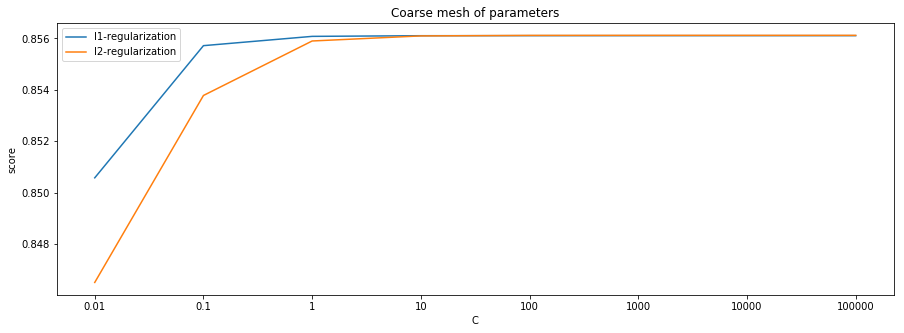

In [184]:
score_l1 = list(pd.Series(gridsearch.cv_results_).mean_test_score[::2])
score_l2 = list(pd.Series(gridsearch.cv_results_).mean_test_score[1::2])
param = list(param_grid['C'])

plt.figure(figsize=(15,5))
plt.title('Coarse mesh of parameters')
plt.plot(range(len(score_l1)), score_l1, label='l1-regularization')
plt.plot(range(len(score_l2)), score_l2, label='l2-regularization')
plt.xticks(range(len(score_l1)), param)
plt.xlabel('C')
plt.ylabel('score')
plt.legend()
plt.show()

Big values of regularizations tells, that our top-10 features very correlated, and we can use only 3-5 of them.

### <center> 10. Conclusions

As we can see, we got much correlated features, and as possible case is drop them from input dataframe. In the end of this work I just got sadness, because here we got much correlated features, and don't have others features. We can't generate new features. <br>
But we can see, that we gotta some killer features, because, just only them gives us 0.85 auc-roc score, and it is not bad baseline for this task. <br>
Thank you for listening! <br>